# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com) in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(precision=None, suppress=True)

In [2]:
df = pd.read_pickle("golden_data.pkl")

In [3]:
df

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0000000000,Audi,A1,66.0000000000,56013,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,3.8000000000,Sedans,Black,Automatic,1,15770,3,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,diesel,5.0000000000,5.0000000000,Used,1,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000
1,1798.0000000000,Audi,A1,141.0000000000,80000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,5.6000000000,Sedans,Red,Automatic,0,14500,2,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,gasoline,3.0000000000,4.0000000000,Used,0,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 0 to 15918
Data columns (total 98 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   displacement                              14994 non-null  float64
 1   make                                      14994 non-null  object 
 2   model                                     14994 non-null  object 
 3   hp                                        14994 non-null  float64
 4   km                                        14994 non-null  int64  
 5   ss_abs                                    14994 non-null  float64
 6   ss_adaptive_cruise_control                14994 non-null  float64
 7   ss_adaptive_headlights                    14994 non-null  float64
 8   ss_alarm_system                           14994 non-null  float64
 9   ss_blind_spot_monitor                     14994 non-null  float64
 10  ss_central_door_lock              

In [5]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
count,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000,14994.0000000000
mean,1432.2098210803,88.2280804234,33885.4438442043,0.9497132186,0.0801653995,0.1334533814,0.1264505802,0.0821661998,0.8591436575,0.1557956516,0.7076163799,0.0320128051,0.9327731092,0.8887555022,0.1946778711,0.0951714019,0.5682939843,0.1421235161,0.7100840336,0.8011871415,0.3710150727,0.1980792317,0.1893424036,0.0050020008,0.9056289182,0.9136321195,0.0561557957,0.8916233160,0.7218220622,0.7469654528,0.1248499400,0.2287581699,4.7908247606,0.2258236628,17688.7454315059,1.4717220221,0.8155929038,0.3209283713,0.1454581833,0.6478591437,0.3780845672,0.8365346138,0.84106976

In [6]:
df.isnull().any()

displacement                                False
make                                        False
model                                       False
hp                                          False
km                                          False
ss_abs                                      False
ss_adaptive_cruise_control                  False
ss_adaptive_headlights                      False
ss_alarm_system                             False
ss_blind_spot_monitor                       False
ss_central_door_lock                        False
ss_central_door_lock_with_remote_control    False
ss_daytime_running_lights                   False
ss_driver_drowsiness_detection              False
ss_driver_side_airbag                       False
ss_electronic_stability_control             False
ss_emergency_brake_assistant                False
ss_emergency_system                         False
ss_fog_lights                               False
ss_head_airbag                              False


In [7]:
df.columns

Index(['displacement', 'make', 'model', 'hp', 'km', 'ss_abs',
       'ss_adaptive_cruise_control', 'ss_adaptive_headlights',
       'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock',
       'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights',
       'ss_driver_drowsiness_detection', 'ss_driver_side_airbag',
       'ss_electronic_stability_control', 'ss_emergency_brake_assistant',
       'ss_emergency_system', 'ss_fog_lights', 'ss_head_airbag',
       'ss_immobilizer', 'ss_isofix', 'ss_led_daytime_running_lights',
       'ss_led_headlights', 'ss_lane_departure_warning_system',
       'ss_night_view_assist', 'ss_passenger_side_airbag', 'ss_power_steering',
       'ss_rear_airbag', 'ss_side_airbag',
       'ss_tire_pressure_monitoring_system', 'ss_traction_control',
       'ss_traffic_sign_recognition', 'ss_xenon_headlights',
       'consumption_comb', 'body', 'body_color', 'gearing_type',
       'inspection_new', 'price', 'age', 'ent_media_bluetooth',

## Feature Engineering

In [8]:
df.select_dtypes(include ="object")

,make,model,body,body_color,gearing_type,fuel,type
0,Audi,A1,Sedans,Black,Automatic,diesel,Used
1,Audi,A1,Sedans,Red,Automatic,gasoline,Used
2,Audi,A1,Sedans,Black,Automatic,diesel,Used
3,Audi,A1,Sedans,Brown,Automatic,diesel,Used
4,Audi,A1,Sedans,Black,Automatic,diesel,Used
...,...,...,...,...,...,...,...
15913,Renault,Espace,Van,White,Automatic,gasoline,Demonstration
15915,Renault,Espace,Van,Grey,Automatic,gasoline,Used
15916,Renault,Espace,Van,White,Automatic,diesel,Pre-registered
15917,Renault,Espace,Van,Grey,Automatic,diesel,Pre-registered


In [9]:
for i in df.select_dtypes(include ="object"):
    print(df[i].unique())

['Audi' 'Opel' 'Renault']
['A1' 'A2' 'A3' 'Astra' 'Corsa' 'Insignia' 'Clio' 'Espace']
['Sedans' 'Station wagon' 'Compact' 'Other' 'Coupe' 'Van' 'Off-Road'
 'Convertible' 'Transporter']
['Black' 'Red' 'Brown' 'White' 'Grey' 'Silver' 'Blue' 'Beige' 'Violet'
 'Yellow' 'Green' 'Bronze' 'Orange' 'Gold']
['Automatic' 'Manual' 'Semi-automatic']
['diesel' 'gasoline' 'lpg' 'electric']
['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']


In [10]:
df.model.value_counts()

A3          2976
Astra       2385
A1          2383
Insignia    2347
Corsa       2169
Clio        1772
Espace       961
A2             1
Name: model, dtype: int64

In [11]:
df[df.model=="A2"]

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
2614,1598.0000000000,Audi,A2,85.0000000000,26166,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,4.9000000000,Off-Road,Grey,Manual,0,28200,1,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,diesel,5.0000000000,5.0000000000,Employee's car,1,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000


In [12]:
df.drop(index = [2614], inplace = True)

In [13]:
df.shape

(14993, 98)

In [14]:
df = pd.get_dummies(df, drop_first =True)

In [15]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Opel,make_Renault,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Manual,gearing_type_Semi-automatic,fuel_electric,fuel_gasoline,fuel_lpg,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0000000000,66.0000000000,56013,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,3.8000000000,1,15770,3,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,5.0000000000,5.0000000000,1,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1798.0000000000,141.0000000000,80000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,

In [16]:
df.shape

(14993, 129)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 15918
Columns: 129 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(38)
memory usage: 11.1 MB


In [18]:
for i, j in enumerate(df):
    print(i,j)

0 displacement
1 hp
2 km
3 ss_abs
4 ss_adaptive_cruise_control
5 ss_adaptive_headlights
6 ss_alarm_system
7 ss_blind_spot_monitor
8 ss_central_door_lock
9 ss_central_door_lock_with_remote_control
10 ss_daytime_running_lights
11 ss_driver_drowsiness_detection
12 ss_driver_side_airbag
13 ss_electronic_stability_control
14 ss_emergency_brake_assistant
15 ss_emergency_system
16 ss_fog_lights
17 ss_head_airbag
18 ss_immobilizer
19 ss_isofix
20 ss_led_daytime_running_lights
21 ss_led_headlights
22 ss_lane_departure_warning_system
23 ss_night_view_assist
24 ss_passenger_side_airbag
25 ss_power_steering
26 ss_rear_airbag
27 ss_side_airbag
28 ss_tire_pressure_monitoring_system
29 ss_traction_control
30 ss_traffic_sign_recognition
31 ss_xenon_headlights
32 consumption_comb
33 inspection_new
34 price
35 age
36 ent_media_bluetooth
37 ent_media_cd_player
38 ent_media_digital_radio
39 ent_media_hands_free_equipment
40 ent_media_mp3
41 ent_media_on_board_computer
42 ent_media_radio
43 ent_media_sound

## multicollinearrty control

In [19]:
df.corr()[(df.corr()> 0.9) & (df.corr() < 1)].any()

displacement                                False
hp                                          False
km                                          False
ss_abs                                      False
ss_adaptive_cruise_control                  False
ss_adaptive_headlights                      False
ss_alarm_system                             False
ss_blind_spot_monitor                       False
ss_central_door_lock                        False
ss_central_door_lock_with_remote_control    False
ss_daytime_running_lights                   False
ss_driver_drowsiness_detection              False
ss_driver_side_airbag                       False
ss_electronic_stability_control             False
ss_emergency_brake_assistant                False
ss_emergency_system                         False
ss_fog_lights                               False
ss_head_airbag                              False
ss_immobilizer                              False
ss_isofix                                   False


In [20]:
df.corr()[(df.corr() < -0.9) & (df.corr() > -1)].any()

displacement                                False
hp                                          False
km                                          False
ss_abs                                      False
ss_adaptive_cruise_control                  False
ss_adaptive_headlights                      False
ss_alarm_system                             False
ss_blind_spot_monitor                       False
ss_central_door_lock                        False
ss_central_door_lock_with_remote_control    False
ss_daytime_running_lights                   False
ss_driver_drowsiness_detection              False
ss_driver_side_airbag                       False
ss_electronic_stability_control             False
ss_emergency_brake_assistant                False
ss_emergency_system                         False
ss_fog_lights                               False
ss_head_airbag                              False
ss_immobilizer                              False
ss_isofix                                   False


In [21]:
df["price"].head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [22]:
df.corr()["price"].sort_values()[:-1]

age                                        -0.4574821147
gearing_type_Manual                        -0.4437249775
km                                         -0.3870156923
model_Corsa                                -0.3802824091
type_Used                                  -0.3329782319
model_Clio                                 -0.2891060002
make_Opel                                  -0.2330467411
model_Astra                                -0.1256473003
ent_media_on_board_computer                -0.0919640600
ent_media_cd_player                        -0.0867953898
body_color_Red                             -0.0787901915
body_Other                                 -0.0701008963
ss_central_door_lock_with_remote_control   -0.0636214668
body_color_Silver                          -0.0634028730
ss_central_door_lock                       -0.0602439653
ss_fog_lights                              -0.0578989714
ss_power_steering                          -0.0570845999
body_color_White               

In [23]:
corr_by_price = df.corr()["price"].sort_values()[:-1]

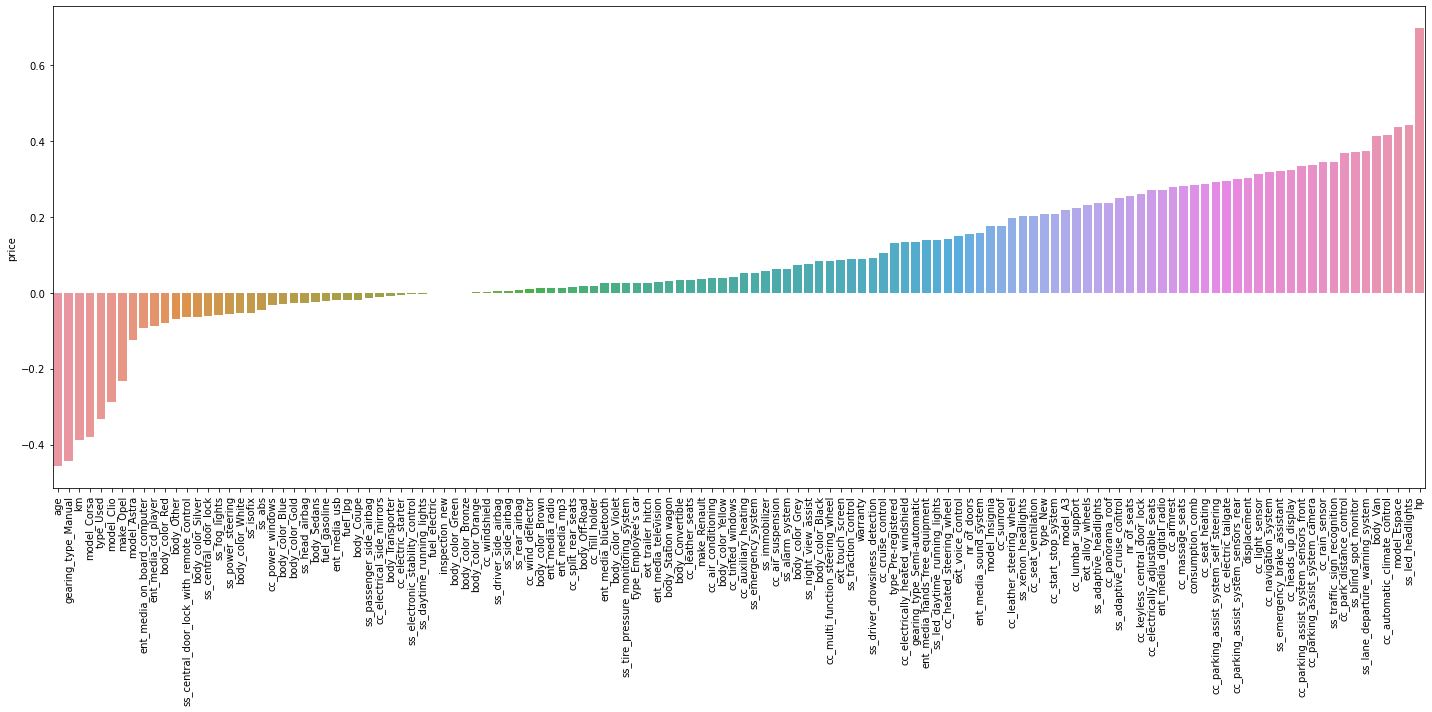

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

<AxesSubplot:xlabel='price', ylabel='Density'>

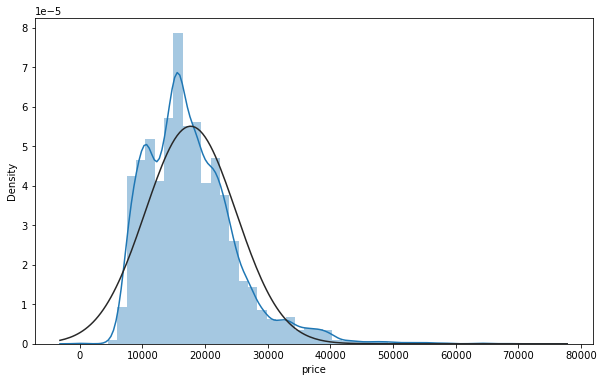

In [25]:
sns.distplot(df.price, bins = 50, fit=norm)

In [26]:
skew(df.price)

1.321252498200133

In [27]:
cars_model = df.iloc[:, 93:99]

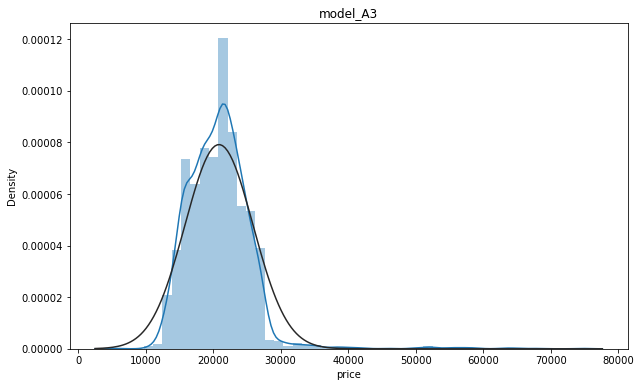

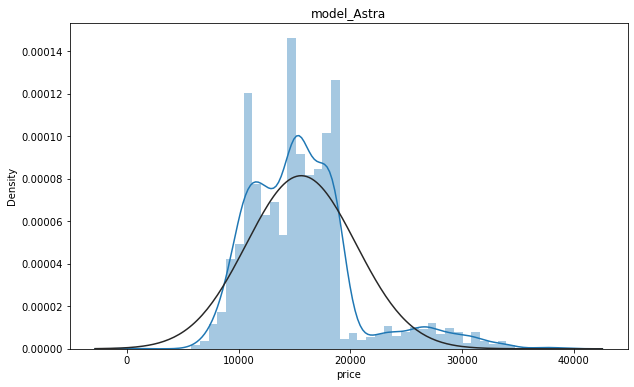

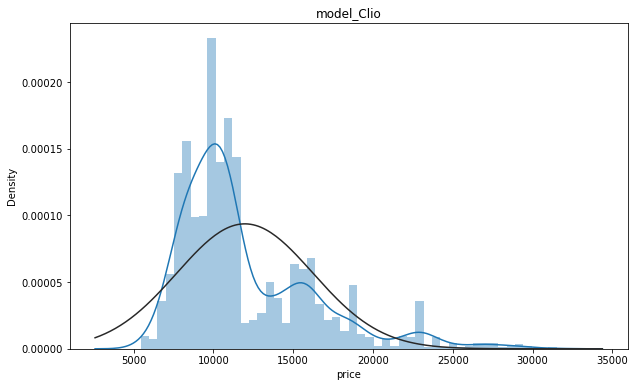

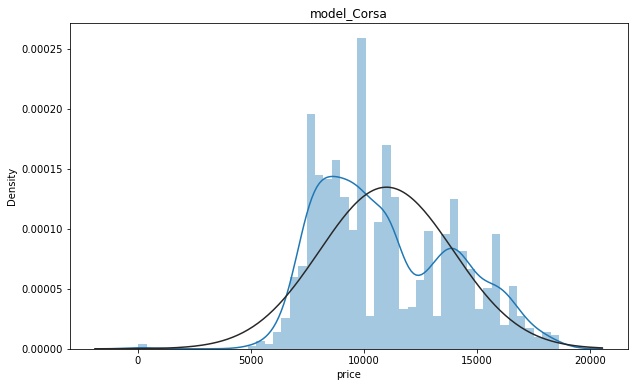

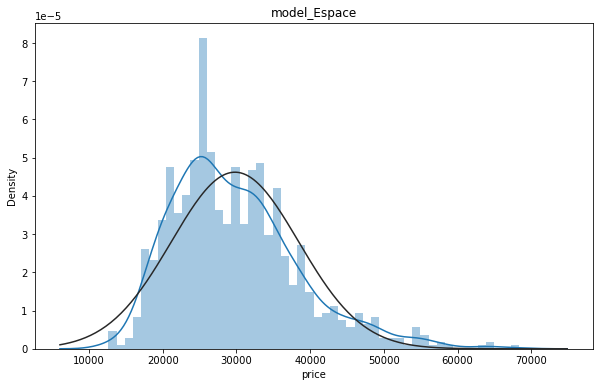

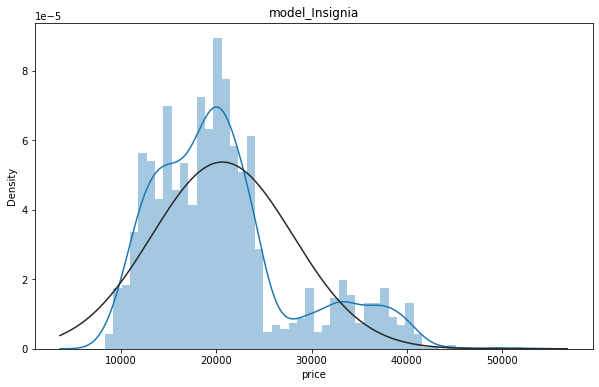

In [28]:
for i in cars_model:
    plt.figure(i)
    plt.title(i)
    sns.distplot(df[df[i] ==1]["price"], bins=50, fit=norm)

In [29]:
skew(cars_model)

array([1.51182658, 1.86427969, 2.36539429, 2.02028167, 3.55948636,
       1.89043576])

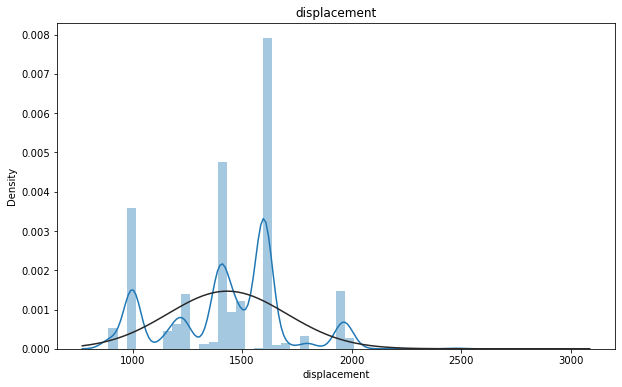

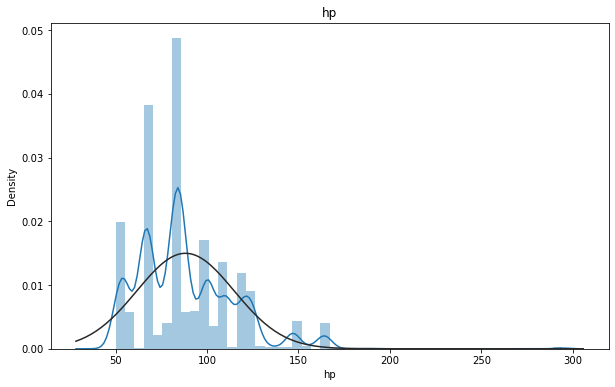

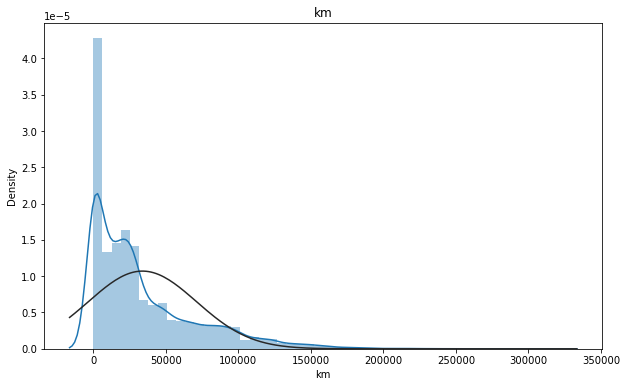

In [30]:
numeric_features = df.iloc[:, :3]
for i in numeric_features:
    plt.figure(i)
    plt.title(i)
    sns.distplot(df[i], bins=50, fit=norm) 

In [31]:
skew(numeric_features)

array([-0.08406863,  1.32590554,  1.56465291])

<AxesSubplot:xlabel='price'>

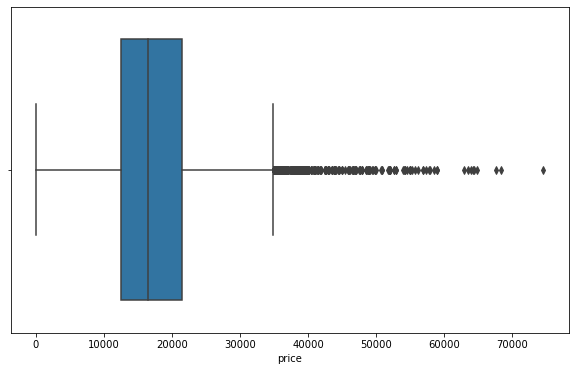

In [32]:
sns.boxplot(df.price)

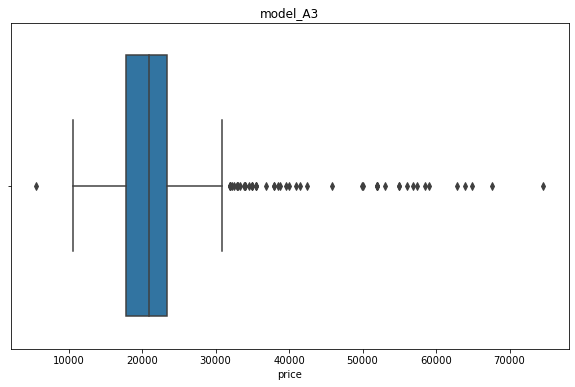

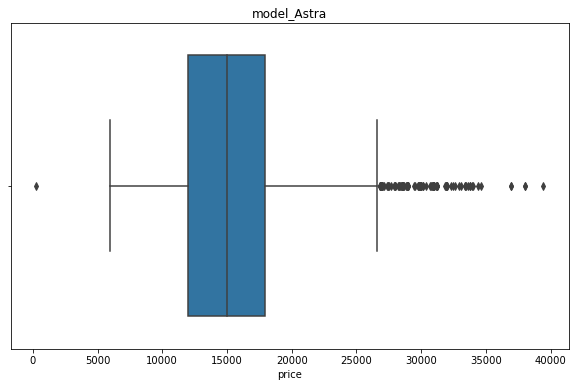

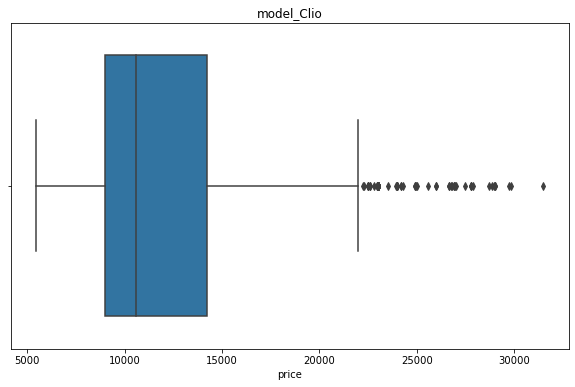

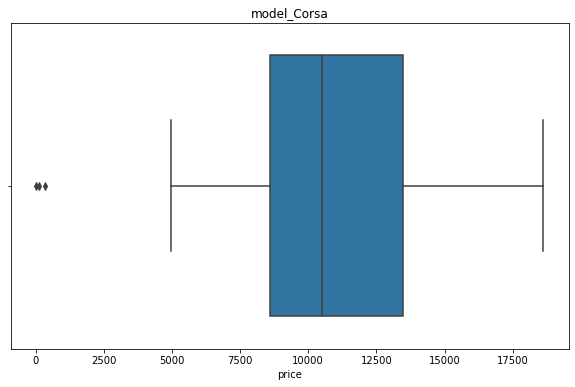

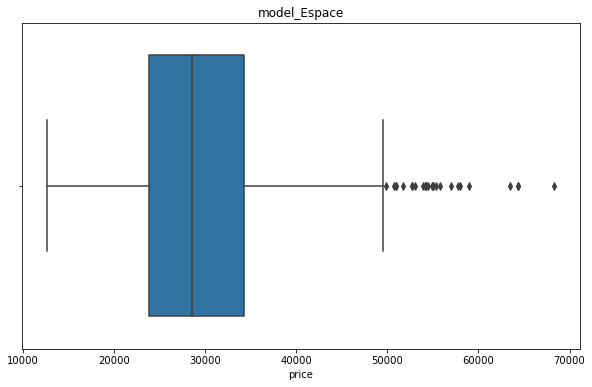

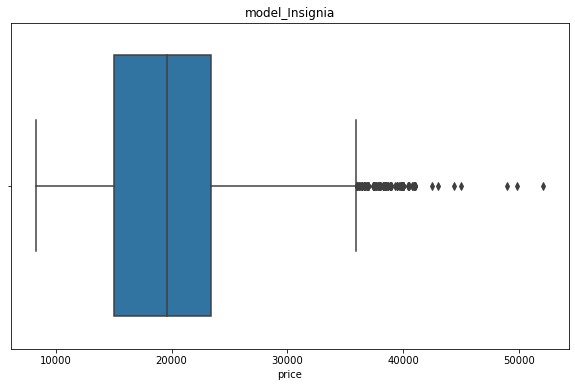

In [33]:
for i in cars_model:
    plt.figure(i)
    plt.title(i)
    sns.boxplot(df[df[i] ==1]["price"])

In [34]:
for i in cars_model:
    
    Q1 = df[df[i] ==1]["price"].quantile(0.25)
    Q3 = df[df[i] ==1]["price"].quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    print(f"count of outlier in {i} column =", df[df[i] ==1]["price"][(df[df[i] ==1]["price"] < lower_lim) | (df[df[i] ==1]["price"] > upper_lim)].count())
    # print(df[df[i] ==1]["price"][(df[df[i] ==1]["price"] < lower_lim) | (df[df[i] ==1]["price"] > upper_lim)].count())
    print()

count of outlier in model_A3 column = 53

count of outlier in model_Astra column = 121

count of outlier in model_Clio column = 79

count of outlier in model_Corsa column = 3

count of outlier in model_Espace column = 26

count of outlier in model_Insignia column = 155



## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [35]:
X = df.drop("price", axis =1)
y = df["price"]

In [36]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [38]:
X_train.shape

(10495, 128)

In [39]:
X_val.shape

(2249, 128)

In [40]:
X_test.shape

(2249, 128)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [41]:
def train_val(y_train, y_train_pred, y_val, y_eval_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "val_set": {"R2" : r2_score(y_val, y_val_pred),
    "mae" : mean_absolute_error(y_val, y_val_pred),
    "mse" : mean_squared_error(y_val, y_val_pred),
    "rmse" : np.sqrt(mean_squared_error(y_val, y_val_pred))}}
    
    return pd.DataFrame(scores)

In [42]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
y_val_pred = lm.predict(X_val)

In [45]:
y_train_pred = lm.predict(X_train)

In [46]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8901279624,0.8836564368
mae,1684.3740322314,1691.7851520945
mse,5874410.9940283205,5572864.0075287763
rmse,2423.7184230080,2360.6914257329


## Cross Valudate

In [47]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [48]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.0360083580,0.0039997101,0.8877047383,-1668.5923444671,-5943992.4010786181,-2438.0304348139
1,0.0312521458,0.0000000000,0.8860455880,-1769.5678990194,-6618462.7418106375,-2572.6373125279
2,0.0312538147,0.0000000000,0.8838200875,-1672.0396918871,-6689920.0443275962,-2586.4879749049
3,0.0312516689,0.0000000000,0.8795454670,-1711.2551554307,-6272442.5492695821,-2504.4844877279
4,0.0312504768,0.0000000000,0.8971648824,-1687.0007956915,-5396650.7866265802,-2323.0692599719
5,0.0312511921,0.0000000000,0.8832482708,-1689.4392698313,-6153884.2076587891,-2480.7023617635
6,0.0156226158,0.0156292915,0.8726947890,-1726.7889989205,-6290356.7351122769,-2508.0583595906
7,0.0312523842,0.0000000000,0.8852063840,-1749.4002681036,-6102766.5107042408,-2470.3778072805
8,0.0312521458,0.0000000000,0.8836630545,-1718.4952535352,-6147983.0679056551,-2479.5126674219
9,0.0312514305,0.0000000000,0.8805057938,-1753.2483458479,-6333949.4584029485,-2516.7338870852


In [49]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.8839599055
test_neg_mean_absolute_error          -1714.5828022734
test_neg_mean_squared_error        -6195040.8502896931
test_neg_root_mean_squared_error      -2488.0094553088
dtype: float64

In [50]:
y_test_pred = lm.predict(X_test)

In [51]:
eval_metrics(y_test, y_test_pred)

r2_score: 0.89698121318919 
 mae: 1651.3896580345931 
 mse: 5409700.961450057 
 rmse: 2325.876385677033


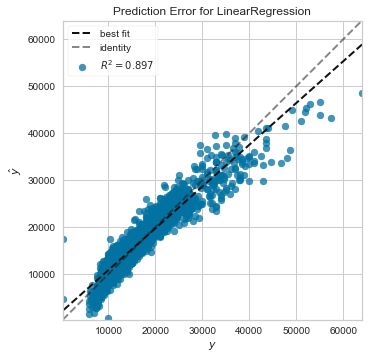

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

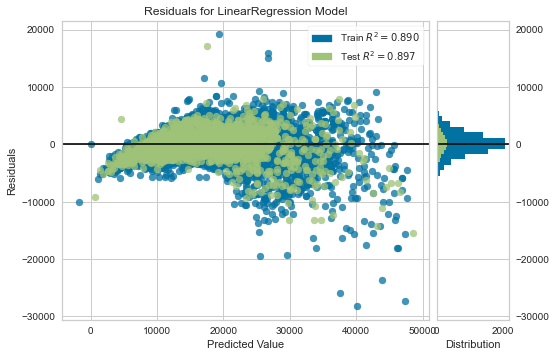

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       

In [54]:
my_dict = { 'Actual': y_test, 'Pred': y_test_pred }
compare = pd.DataFrame(my_dict)

In [55]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred
2972,14450,16353.5790954116
6914,11990,10527.0461074833
9549,9499,9792.8656823042
3550,15899,16315.1419838529
6987,11955,12339.0448587916
1782,16940,17973.7260950297
9219,8200,8700.6520751113
7509,14400,17325.7457375507
3082,15445,13211.9335265791
9684,14480,16004.0751361956


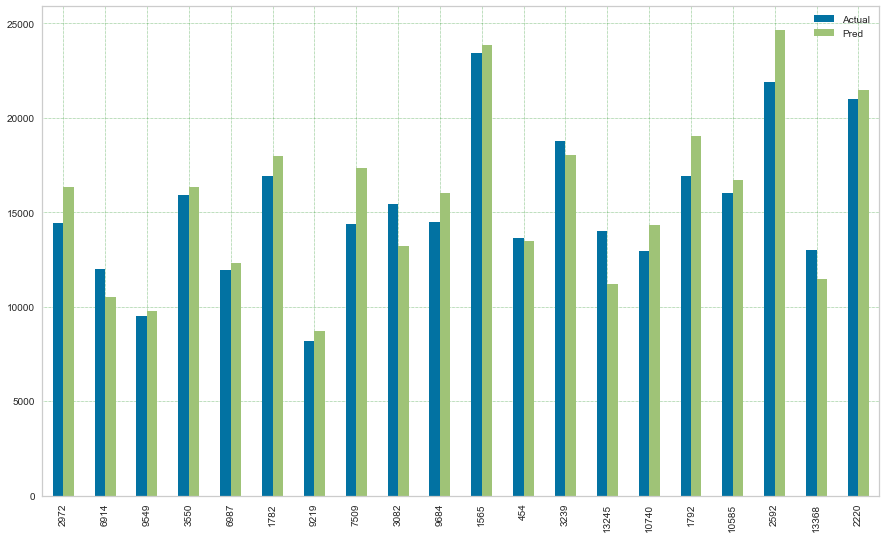

In [56]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [57]:
from sklearn.linear_model import Ridge, RidgeCV

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
X_train = scaler.transform(X_train)

In [61]:
X_val = scaler.transform(X_val)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
ridge_model = Ridge()

In [64]:
ridge_model.fit(X_train, y_train)

Ridge()

In [65]:
y_val_pred = ridge_model.predict(X_val)

In [66]:
y_train_pred = ridge_model.predict(X_train)

In [67]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8901279416,0.8836596080
mae,1684.3315083568,1691.7229097019
mse,5874412.1063822666,5572712.1087675495
rmse,2423.7186524806,2360.6592529985


In [68]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])

In [69]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring='neg_root_mean_squared_error')

In [70]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [71]:
ridge_cv_model.alpha_

41.42

In [72]:
y_val_pred = ridge_cv_model.predict(X_val)
y_train_pred = ridge_cv_model.predict(X_train)

In [73]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8901018624,0.8837507777
mae,1682.8603144334,1689.6301922110
mse,5875806.4559986843,5568345.0723569160
rmse,2424.0062821698,2359.7341105211


In [74]:
y_test_pred = ridge_cv_model.predict(X_test)

In [75]:
eval_metrics(y_test, y_test_pred)

r2_score: 0.8968785317633343 
 mae: 1649.469986923354 
 mse: 5415092.946983668 
 rmse: 2327.035226846312


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [76]:
from sklearn.linear_model import Lasso, LassoCV

In [77]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [78]:
y_train_pred = lasso_model.predict(X_train)

In [79]:
y_val_pred = lasso_model.predict(X_val)

In [80]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8901112673,0.8837308424
mae,1683.5667503884,1690.4468138181
mse,5875303.6173944017,5569299.9750623498
rmse,2423.9025593853,2359.9364345385


In [81]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1).fit(X_train, y_train)

In [82]:
lasso_cv_model.alpha_

7.08

In [83]:
y_train_pred = lasso_cv_model.predict(X_train)

In [84]:
y_val_pred = lasso_cv_model.predict(X_val)

In [85]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8898777077,0.8840082854
mae,1681.1010638568,1685.5529373974
mse,5887791.0986873768,5556010.4359189561
rmse,2426.4770962627,2357.1190966769


In [86]:
y_test_pred = lasso_cv_model.predict(X_test)

In [87]:
eval_metrics(y_test, y_test_pred)

r2_score: 0.8971358277396959 
 mae: 1647.135093053576 
 mse: 5401581.874549314 
 rmse: 2324.130348011771


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [88]:
from sklearn.linear_model import ElasticNet

In [89]:
elastic_model = ElasticNet()
elastic_model.fit(X_train,y_train)

ElasticNet()

In [90]:
y_train_pred = elastic_model.predict(X_train)

In [91]:
y_val_pred = elastic_model.predict(X_val)

In [92]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8545365061,0.8545998377
mae,1863.5742775478,1819.9251660520
mse,7777341.4100817926,6964676.9344629776
rmse,2788.7885201431,2639.0674365129


In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
elastic_model = ElasticNet()

In [95]:
param_grid = {'alpha':[5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [96]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [97]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [98]:
grid_model.best_estimator_

ElasticNet(alpha=7, l1_ratio=1)

In [99]:
y_train_pred = grid_model.predict(X_train)

In [100]:
y_val_pred = grid_model.predict(X_val)

In [101]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8898822354,0.8840052439
mae,1681.1162022852,1685.5975523913
mse,5887549.0209970754,5556156.1254734909
rmse,2426.4272132082,2357.1500006307


In [102]:
y_test_pred = grid_model.predict(X_test)

In [103]:
eval_metrics(y_test, y_test_pred)

r2_score: 0.8971372732790222 
 mae: 1647.155946761092 
 mse: 5401505.966690903 
 rmse: 2324.1140175754936


## Feature İmportance

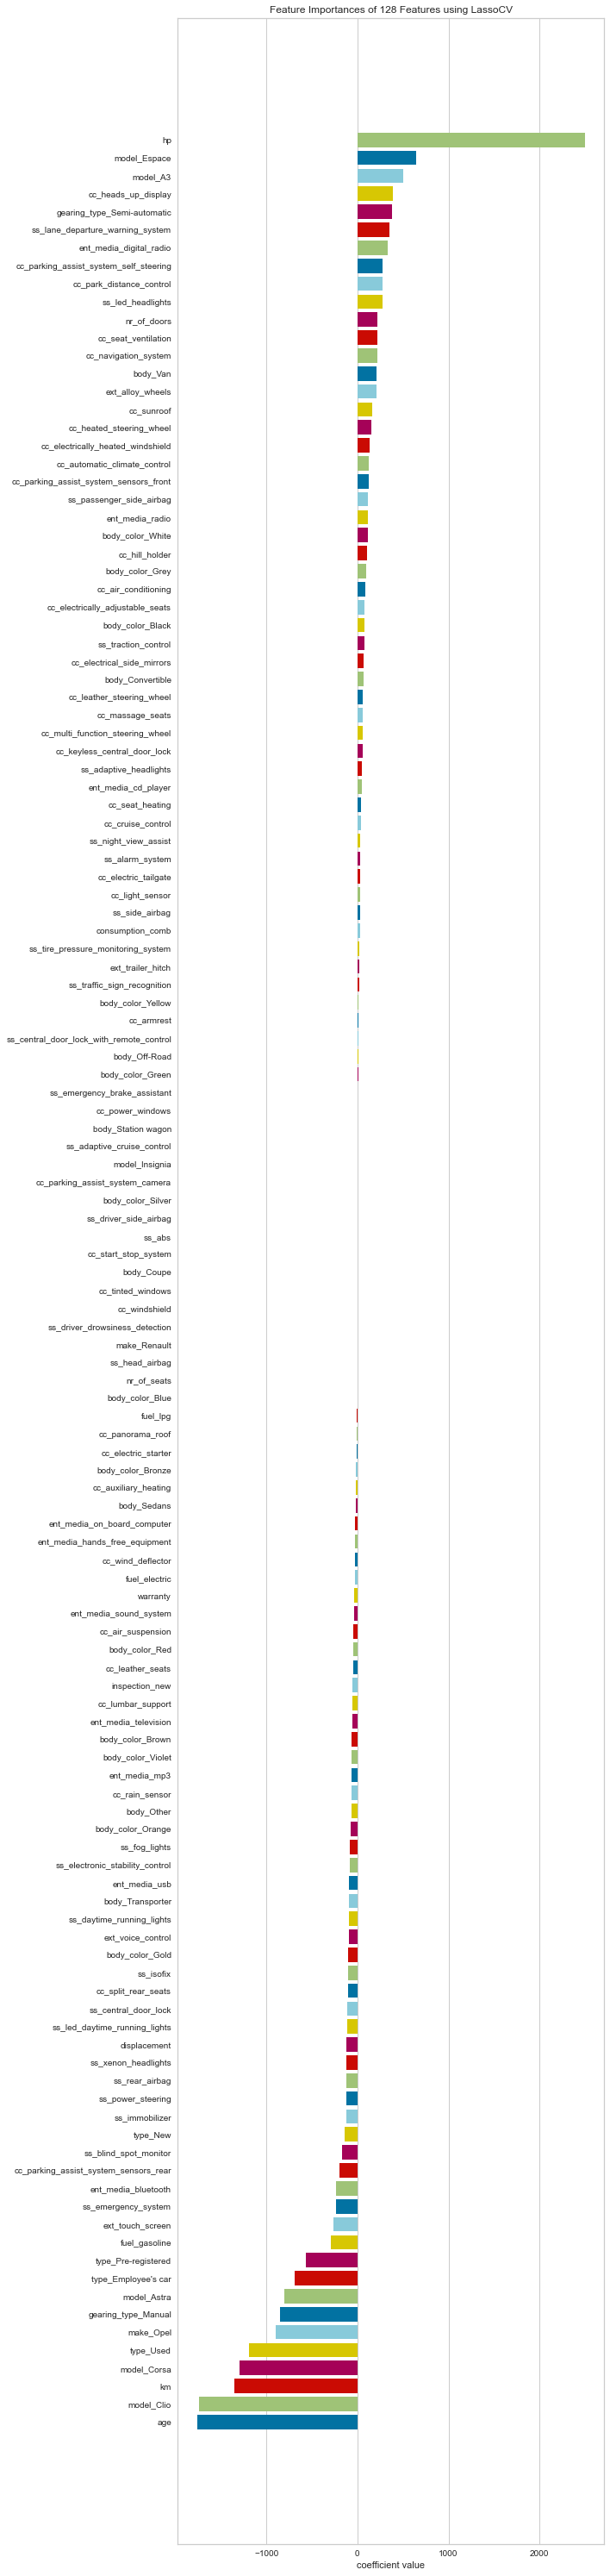

In [104]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=X.columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [105]:
df=pd.read_pickle("golden_data.pkl")

In [106]:
df

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0000000000,Audi,A1,66.0000000000,56013,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,3.8000000000,Sedans,Black,Automatic,1,15770,3,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,diesel,5.0000000000,5.0000000000,Used,1,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000
1,1798.0000000000,Audi,A1,141.0000000000,80000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,5.6000000000,Sedans,Red,Automatic,0,14500,2,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,gasoline,3.0000000000,4.0000000000,Used,0,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.00

In [107]:
df_new = df[["model", "hp", "km","age", "price", "gearing_type"]]

In [108]:
df_new

,model,hp,km,age,price,gearing_type
0,A1,66.0000000000,56013,3,15770,Automatic
1,A1,141.0000000000,80000,2,14500,Automatic
2,A1,85.0000000000,83450,3,14640,Automatic
3,A1,66.0000000000,73000,3,14500,Automatic
4,A1,66.0000000000,16200,3,16790,Automatic
...,...,...,...,...,...,...
15913,Espace,165.0000000000,1000,0,39950,Automatic
15915,Espace,165.0000000000,9900,0,39885,Automatic
15916,Espace,146.0000000000,15,0,39875,Automatic
15917,Espace,147.0000000000,10,0,39700,Automatic


In [109]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 0 to 15918
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14994 non-null  object 
 1   hp            14994 non-null  float64
 2   km            14994 non-null  int64  
 3   age           14994 non-null  int64  
 4   price         14994 non-null  int64  
 5   gearing_type  14994 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 820.0+ KB


In [110]:
df_new[df_new.model == "A2"]

,model,hp,km,age,price,gearing_type
2614,A2,85.0000000000,26166,1,28200,Manual


In [111]:
df_new.drop(index=[2614], inplace =True)

In [112]:
df_new = pd.get_dummies(df_new, drop_first = True)

In [113]:
df_new

,hp,km,age,price,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Manual,gearing_type_Semi-automatic
0,66.0000000000,56013,3,15770,0,0,0,0,0,0,0,0
1,141.0000000000,80000,2,14500,0,0,0,0,0,0,0,0
2,85.0000000000,83450,3,14640,0,0,0,0,0,0,0,0
3,66.0000000000,73000,3,14500,0,0,0,0,0,0,0,0
4,66.0000000000,16200,3,16790,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15913,165.0000000000,1000,0,39950,0,0,0,0,1,0,0,0
15915,165.0000000000,9900,0,39885,0,0,0,0,1,0,0,0
15916,146.0000000000,15,0,39875,0,0,0,0,1,0,0,0
15917,147.0000000000,10,0,39700,0,0,0,0,1,0,0,0


In [114]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [115]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [116]:
scaler = StandardScaler()

In [117]:
X_train = scaler.fit_transform(X_train)

In [118]:
X_val = scaler.transform(X_val)

In [119]:
X_test = scaler.transform(X_test)

In [120]:
lasso_final_model = LassoCV(alphas = alpha_space, max_iter = 100000, cv =10)

In [121]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ]),
        cv=10, max_iter=100000)

In [122]:
lasso_final_model.alpha_

0.01

In [123]:
y_train_pred = lasso_final_model.predict(X_train)
y_val_pred = lasso_final_model.predict(X_val)

In [124]:
train_val(y_train, y_train_pred, y_val, y_val_pred)

,train_set,val_set
R2,0.8471274809,0.8522104356
mae,1918.2363445778,1885.8421419893
mse,8173471.8546117321,7079129.4457934601
rmse,2858.9284451717,2660.6633469482


In [125]:
y_test_pred =lasso_final_model.predict(X_test)

In [126]:
eval_metrics(y_test, y_test_pred)

r2_score: 0.8602922650104219 
 mae: 1850.965728325418 
 mse: 7336303.325752469 
 rmse: 2708.561117226722


## 7. Visually Compare Models Performance In a Graph

In [127]:
scores = {"linear_m": {"r2_score": 0.8969 , 
 "mae": 1651.38, 
 "rmse": 2325.87},

 "ridge_m": {"r2_score": 0.8968, 
 "mae": 1649.46,
 "rmse": 2327.03},
    
 "lasso_m": {"r2_score": 0.8971, 
 "mae": 1647.13, 
 "rmse": 2324.13},

 "elastic_m": {"r2_score": 0.8971, 
 "mae": 1647.13, 
 "rmse": 2324.13},
         
 "final_m": {"r2_score": 0.8602 , 
 "mae": 1850.96 , 
 "rmse": 2708.56}}
scores = pd.DataFrame(scores)
scores

,linear_m,ridge_m,lasso_m,elastic_m,final_m
r2_score,0.8969000000,0.8968000000,0.8971000000,0.8971000000,0.8602000000
mae,1651.3800000000,1649.4600000000,1647.1300000000,1647.1300000000,1850.9600000000
rmse,2325.8700000000,2327.0300000000,2324.1300000000,2324.1300000000,2708.5600000000


In [128]:
scores.T

,r2_score,mae,rmse
linear_m,0.8969000000,1651.3800000000,2325.8700000000
ridge_m,0.8968000000,1649.4600000000,2327.0300000000
lasso_m,0.8971000000,1647.1300000000,2324.1300000000
elastic_m,0.8971000000,1647.1300000000,2324.1300000000
final_m,0.8602000000,1850.9600000000,2708.5600000000


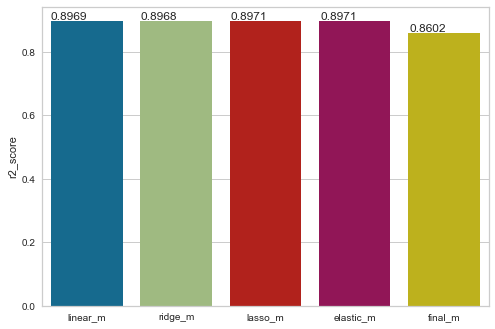

In [129]:
ax = sns.barplot(y = scores.T["r2_score"] , x= scores.T.index)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

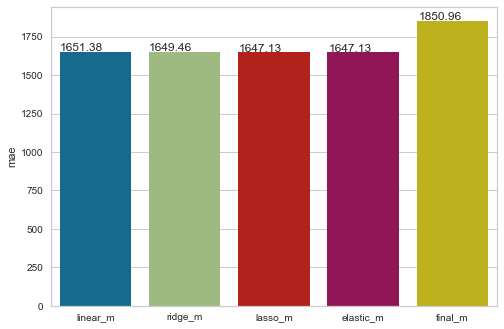

In [130]:
ax = sns.barplot(y = scores.T["mae"] , x= scores.T.index)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

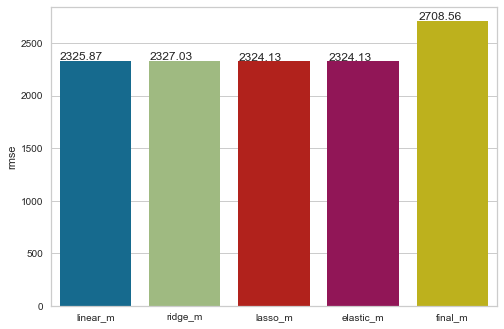

In [131]:
ax = sns.barplot(y = scores.T["rmse"] , x= scores.T.index)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Predict new 

In [133]:
lasso_final_model = Lasso(alpha=0.01)

In [134]:
lasso_final_model.fit(X,y)

Lasso(alpha=0.01)

In [135]:
import pickle
pickle.dump(lasso_final_model, open("lasso_final_model", 'wb'))

In [136]:
final_model=pickle.load(open("lasso_final_model", "rb"))

In [137]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3',
    "gearing_type": "Automatic"
}

In [138]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp,age,km,model,gearing_type
0,200,1,100000,A3,Automatic


In [139]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,hp,km,age,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Manual,gearing_type_Semi-automatic
0,200,100000,1,1,0,0,0,0,0,0,0


In [140]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,hp,km,age,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Manual,gearing_type_Semi-automatic
0,200,100000,1,1,0,0,0,0,0,0,0


In [141]:
my_dict = scaler.transform(my_dict)

In [142]:
final_model.predict(my_dict)

array([26032.1105679])